## 综合描述
使用随机森林和神经网络对电信客户流失率进行预测，并计算召回率和ROC等性能评价指标，可以通过以下步骤实现：

1.数据收集和预处理
首先，需要收集电信客户流失率的数据，并进行预处理，包括数据清洗、缺失值填充、数据归一化或标准化等步骤，以确保数据的质量和一致性。通常，可以使用Python的Pandas库进行数据处理。

2.模型训练和评估
使用随机森林和神经网络进行模型训练，并使用测试集进行模型评估，计算召回率和ROC等性能评价指标。可以使用Python的Scikit-learn库进行模型训练和评估。

3.调整模型参数
在模型训练和评估过程中，可以尝试不同的参数组合，以获得更好的性能。可以使用Python的Scikit-learn库进行网格搜索或随机搜索调整模型参数。

模型应用和部署
最后，可以使用模型对新数据进行预测，并将模型部署到生产环境中。可以使用Python的Scikit-learn库或TensorFlow库进行模型应用和部署。

综上所述，使用随机森林和神经网络对电信客户流失率进行预测，并计算召回率和ROC等性能评价指标，需要进行数据收集和预处理、模型训练和评估、调整模型参数以及模型应用和部署等步骤。可以使用Python的Pandas、Scikit-learn和TensorFlow等库进行实现。

In [1]:
# 读取原始数据并且对数据进行分析
import pandas as pd
df = pd.read_csv('churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

该数据集包含3333条记录，有21个特征，其中有8个特征的数据类型为float64，8个特征的数据类型为int64，5个特征的数据类型为object。数据中每个记录表示一个电信客户的相关信息。具体特征解释如下：

State: 客户所在州的名称，数据类型为object。
Account Length: 客户使用该电信公司的时长，数据类型为int64。
Area Code: 客户所在地区的区号，数据类型为int64。
Phone: 客户电话号码，数据类型为object。
Int'l Plan: 客户是否开通国际漫游业务，数据类型为object。
VMail Plan: 客户是否开通语音信箱业务，数据类型为object。
VMail Message: 客户语音信箱中未读信息数量，数据类型为int64。
Day Mins: 客户白天通话时长（分钟），数据类型为float64。
Day Calls: 客户白天通话次数，数据类型为int64。
Day Charge: 客户白天通话费用，数据类型为float64。
Eve Mins: 客户晚间通话时长（分钟），数据类型为float64。
Eve Calls: 客户晚间通话次数，数据类型为int64。
Eve Charge: 客户晚间通话费用，数据类型为float64。
Night Mins: 客户夜间通话时长（分钟），数据类型为float64。
Night Calls: 客户夜间通话次数，数据类型为int64。
Night Charge: 客户夜间通话费用，数据类型为float64。
Intl Mins: 客户国际通话时长（分钟），数据类型为float64。
Intl Calls: 客户国际通话次数，数据类型为int64。
Intl Charge: 客户国际通话费用，数据类型为float64。
CustServ Calls: 客户联系客服的次数，数据类型为int64。
Churn?: 客户是否流失，数据类型为object。
数据集中没有缺失值，每个特征都有3333个非空值。可以使用这个数据集来建立模型，预测客户是否会流失，并进行性能评估。

经观察后发现，state、Int'l Plan、VMail Plan和Churn?是文本特征，需要将其编码成数字特征。此外，Phone电话号码是无关特征。需要对这五个特征处理

In [2]:
df.drop(['Phone'],inplace=True,axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 其中FALSE，未流失被编码为0，TRUE流失被编码为1
for f in ['State',"Int'l Plan","VMail Plan","Churn?"]:
    df[f] = le.fit_transform(df[f])

In [4]:
# 输出相关性矩阵
df.corr().to_csv('pcc.csv')
df.corr()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
State,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
Account Length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area Code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Int'l Plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
VMail Plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
VMail Message,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Day Mins,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Day Calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Day Charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Eve Mins,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


### 可视化相关性矩阵

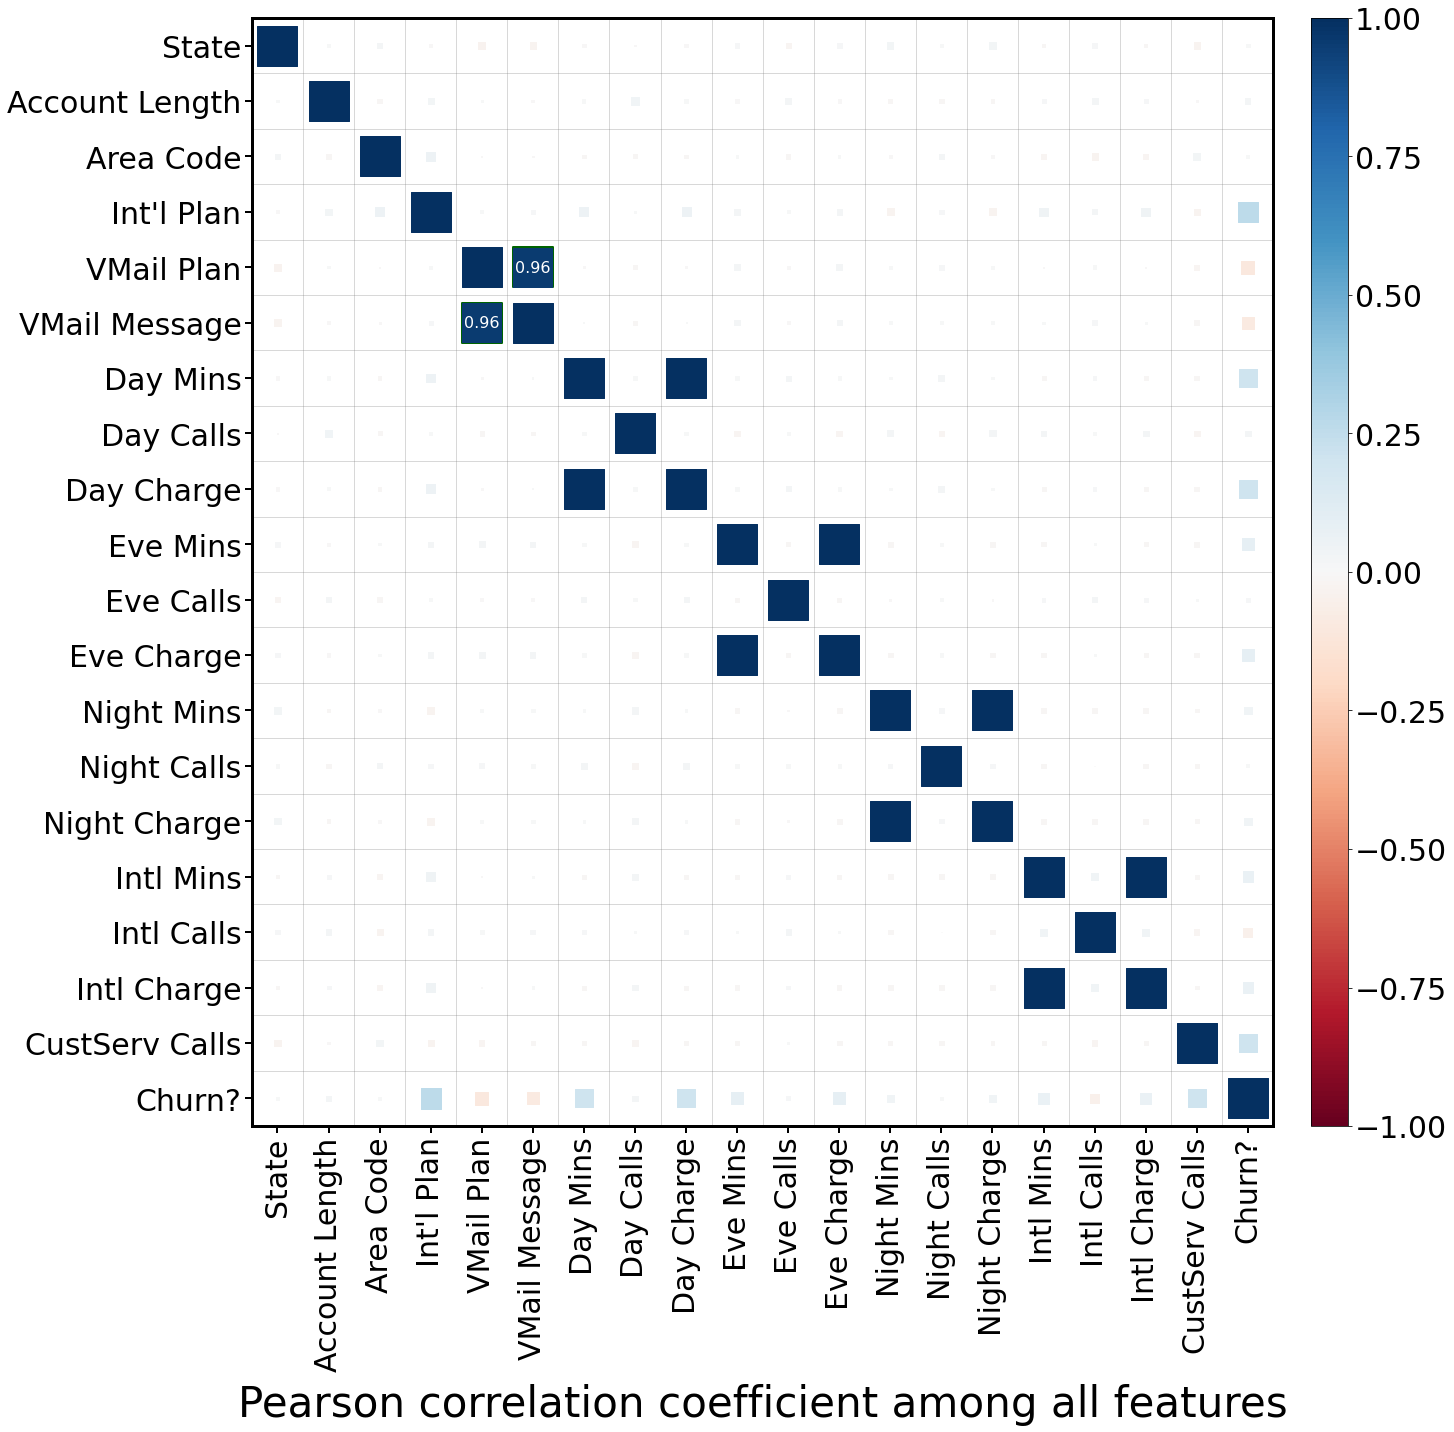

In [5]:
import pandas as pd
import numpy as np
from pylab import *

features = df.columns.to_list()
pccdata = df.corr()

n = len(features)
z = np.array(pccdata)

# 画图设置
plt.figure(figsize=(21,20)) 
plt.tick_params(which='major',length=7,width=2)
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.ylim([-.5,len(features)-.5])
plt.xlim([-.5,len(features)-.5])
ax=plt.gca()
bwith = 3
ax.spines['bottom'].set_linewidth(bwith)    
ax.spines['top'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)  
ax.spines['right'].set_linewidth(bwith)
plt.xticks([i for i in range(len(features))], features, rotation=90,size = 30)
plt.yticks([i for i in range(len(features))], features[::-1], rotation=0,size = 30)
cm = plt.cm.RdBu

# 建立x，y坐标矩阵，注意scatter如果不是按照array输出会报错
x_pos = []
y_pos_temp = []
for i in range(n-1,-1,-1):
    x_pos.append([i]*n)
for i in range(n):    
    y_pos_temp.append(i)
y_pos  = []
for i in range(n):
    y_pos.append(y_pos_temp)
plt.xlabel('Pearson correlation coefficient among all features',size=42,labelpad=12)
# 画散点图和分隔线

for i in range(z.shape[0]):
    for j in range(z.shape[1]-1,-1,-1):
        num = abs(round(z[i][j],2))
        if num >= .95 and num < 0.99999999:
            plt.scatter(i,z.shape[0]-1-j,marker = 's',s=1600,c='white',edgecolors='darkgreen',linewidths=2)
            plt.text(i,z.shape[0]-1-j,'%.2f'%round(z[i][j],2),
                     verticalalignment="center",horizontalalignment="center",color='white',size=16)

plt.scatter(y_pos,x_pos,s=abs(z)*1600,c=np.array(z),vmin=-1,vmax=1,cmap = cm,marker = 's')
for i in range(n):
    plt.vlines(i+.5, -1, n,lw=.5,color='grey',alpha=0.6)
    plt.hlines(i+.5, -1, n,lw=.5,color='grey',alpha=0.6)
    
# 保存图片
cb = plt.colorbar(pad=0.03,aspect=30)
cb.ax.tick_params(labelsize=30) #设置colorbar字体大小

plt.tight_layout()
plt.savefig('pcc.pdf',dpi = 900)

这个表格是一个相关性矩阵。其中每个单元格中的数字表示相关性系数。相关性系数是一个介于-1和1之间的数字，用于衡量两个变量之间的线性关系。

相关系数为正数意味着当一个变量增加时，另一个变量也会增加。相关系数为负数意味着当一个变量增加时，另一个变量会减少。相关系数越接近1或-1，表示两个变量之间的关系越强。相关系数越接近0，表示两个变量之间的关系越弱。

在这个表格中，最后一列“Churn?”表示客户是否流失。它是我们要预测的目标变量。其他列都是特征变量，我们可以使用它们来预测客户是否会流失。例如，可以看到“Int'l Plan”列与“Churn?”列之间的相关系数为0.2598，这意味着这两个变量之间存在一定程度的正相关关系。这意味着使用国际计划的客户更有可能流失。同样具有会导致客户流失的因素有Day Mins: 客户白天通话时长（分钟），Day Charge: 客户白天通话费用和CustServ Calls: 客户联系客服的次数。这析分析说明，客户电话打的越多，客户的通话费用越多，客户越容易流失去找更具有性价比的代替产品。此外，若客户联系客服次数多也会导致客户易于流失。

此外，若客户开通了语音信箱，从相关性分析可知客户不易于流失

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# 导入所需的库和数据
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 划分 X 和 y
X = df.drop('Churn?', axis=1)
y = df['Churn?']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 归一化
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 定义随机森林分类器
rfc = RandomForestClassifier()

# 进行训练
rfc.fit(X_train, y_train)
# 对训练集进行预测
y_train_pred = rfc.predict(X_train)

# 对测试集进行预测
y_test_pred = rfc.predict(X_test)

# 计算训练集和测试集的精度
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('训练集精度：', train_accuracy)
print('测试集精度：', test_accuracy)


# 定义参数范围
param_grid = {
    'max_depth': [5,7, 10,12, 15]
}

# 使用网格搜索来寻找最佳参数
rfc_gs = GridSearchCV(rfc, param_grid, cv=5)
rfc_gs.fit(X_train, y_train)

# 打印最佳参数组合
print('最佳参数组合：', rfc_gs.best_params_)

print('-'*60)
print('经过调参数后的精度')

rfc_gs = rfc_gs.best_estimator_
# 进行训练
rfc.fit(X_train, y_train)
# 对训练集进行预测
y_train_pred = rfc.predict(X_train)

# 对测试集进行预测
y_test_pred = rfc.predict(X_test)

# 计算训练集和测试集的精度
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('训练集精度：', train_accuracy)
print('测试集精度：', test_accuracy)

训练集精度： 1.0
测试集精度： 0.9490254872563718
最佳参数组合： {'max_depth': 10}
------------------------------------------------------------
经过调参数后的精度
训练集精度： 1.0
测试集精度： 0.9505247376311844


测试集上结果：
准确率:0.9505247376311844
精确率:0.9594594594594594
召回率:0.7029702970297029
F1分数:0.8114285714285714
AUC值:0.8488349718364062


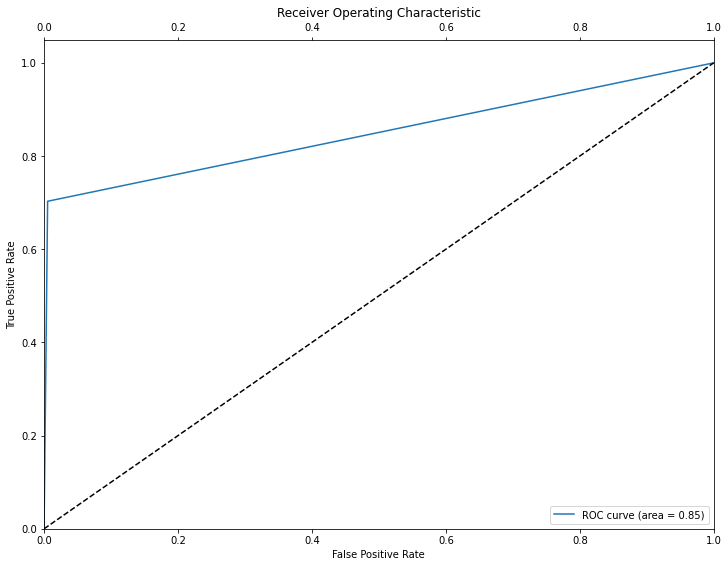

<Figure size 432x288 with 0 Axes>

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = cm.ravel()

# 计算准确率，精确率，召回率，F1分数和AUC值
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
print('测试集上结果：')
print(f"准确率:{accuracy}")
print(f"精确率:{precision}")
print(f"召回率:{recall}")
print(f"F1分数:{f1}")
print(f"AUC值:{auc}")

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# 绘制ROC曲线
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('RFR.pdf',dpi=300)

### 神经网络模型

In [51]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# 创建模型
model = Sequential()
# 添加输入层和隐藏层
model.add(Dense(units=64, activation='relu', input_dim=19))
model.add(Dense(units=32, activation='relu', input_dim=19))
# 添加 Dropout 层，防止过拟合
model.add(Dropout(0.5))
# 添加输出层
model.add(Dense(units=1, activation='sigmoid'))

# 编译模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2)

# 预测结果
y_train_pred = model.predict(X_train)
y_train_pred = np.where(y_train_pred > 0.5, 1, 0)

y_test_pred = model.predict(X_test)
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)

Epoch 1/300
134/134 [==============================] - 1s 2ms/step - loss: 8.3796 - accuracy: 0.7303 - val_loss: 0.6661 - val_accuracy: 0.8352
Epoch 2/300
134/134 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.8124 - val_loss: 0.4762 - val_accuracy: 0.8333
Epoch 3/300
134/134 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.8579 - val_loss: 0.4842 - val_accuracy: 0.8333
Epoch 4/300
134/134 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.8593 - val_loss: 0.4721 - val_accuracy: 0.8390
Epoch 5/300
134/134 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.8612 - val_loss: 0.4449 - val_accuracy: 0.8390
Epoch 6/300
134/134 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8612 - val_loss: 0.4527 - val_accuracy: 0.8390
Epoch 7/300
134/134 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8612 - val_loss: 0.4400 - val_accuracy: 0.8390

训练集精度： 0.8934733683420856
测试集精度： 0.9130434782608695
测试集上结果：
准确率:0.9130434782608695
精确率:0.8524590163934426
召回率:0.5148514851485149
F1分数:0.6419753086419753
AUC值:0.7494752125389217


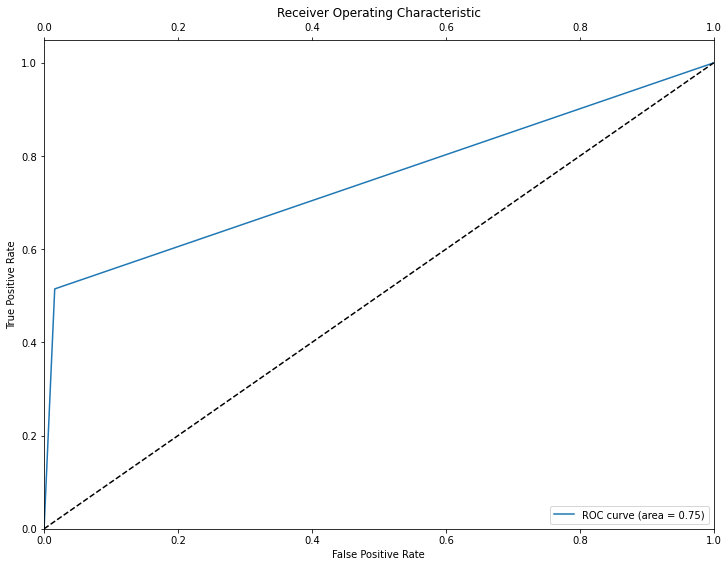

<Figure size 432x288 with 0 Axes>

In [52]:
# 计算训练集和测试集的精度
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('训练集精度：', train_accuracy)
print('测试集精度：', test_accuracy)

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = cm.ravel()

# 计算准确率，精确率，召回率，F1分数和AUC值
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
print('测试集上结果：')
print(f"准确率:{accuracy}")
print(f"精确率:{precision}")
print(f"召回率:{recall}")
print(f"F1分数:{f1}")
print(f"AUC值:{auc}")


# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# 绘制ROC曲线
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

plt.savefig('ANN.pdf',dpi=300)

### 分析结果
根据给出的数据，在客户流失的二分类任务中，使用随机森林模型和神经网络模型进行比较。随机森林模型在测试集上的精度为0.951，准确率为0.951，精确率为0.959，召回率为0.703，F1分数为0.811，AUC值为0.849。神经网络模型在测试集上的精度为0.913，准确率为0.913，精确率为0.852，召回率为0.515，F1分数为0.642，AUC值为0.749。

从上述数据可以看出，随机森林模型相比于神经网络模型，在测试集上的表现更优秀。随机森林模型的精度更高，且准确率、精确率、召回率、F1分数和AUC值也均比神经网络模型要高。这表明在这个任务中，随机森林模型更适合用于客户流失的预测。

需要注意的是，虽然神经网络模型在召回率方面稍差于随机森林模型，但精确率相对更低，这意味着神经网络模型对负例（即未流失客户）的误判率更高。这对于企业来说可能是不利的，因为误判未流失客户为流失客户会导致不必要的损失。

此外，RFR需要手动调整超参数，而神经网络在训练时可以自动调整参数。因此，当面对更大规模的数据集和更复杂的问题时，神经网络可能会比RFR更加有效。

